In [1]:
import random
import numpy as np
import math

In [2]:
def create_individu(n):
  populasi =  np.random.randint(0,2,(n,8))
  return populasi
 
def makeX1(populasi,i):
  nilai_x1 = -1+((2+1)/((2**-1)+(2**-2)+(2**-3)+(2**-4)))*(populasi[i][0]*2**-1 + populasi[i][1]*2**-2 + populasi[i][2]*2**-3 + populasi[i][3]*2**-4) 
  return nilai_x1
 
def makeX2(populasi,i):
  nilai_x2 = -1+((1+1)/((2**-1)+(2**-2)+(2**-3)+(2**-4)))*(populasi[i][4]*2**-1 + populasi[i][5]*2**-2 + populasi[i][6]*2**-3 + populasi[i][7]*2**-4)     
  return nilai_x2 
 
def funcH(x1,x2):
  nilai_min = (np.cos(x1)*np.sin(x2))-(x1/((x2**2)+1)) 
  return nilai_min
 
def funcFitness(H):
  fitness = 1/(H+3)
  return fitness

def meanFitness(populasi):
  nilai_rata = 0
  for i in range(len(populasi)):
    nilai_rata += funcFitness(populasi,i)
  nilai_rata_real = nilai_rata / len(populasi)
  return nilai_rata_real

In [3]:
def EncodeKromosom(populasi,start_gen):
   i=0
   temp_populasi = []
   for i in range(len(populasi)):
     x1 = makeX1(populasi,i)
     x2 = makeX2(populasi,i)
     b = funcH(x1,x2) 
     a = funcFitness(b)
     temp_populasi.append([a,populasi[i],start_gen,x1,x2,b])
   return temp_populasi

In [4]:
def elitisme(populasi):
   new_populasi = populasi[0][1].copy()
   return new_populasi

In [5]:
def rouletselectparent(populasi):
  parent_populasi = []
  total=0
  for a in range(len(populasi)):
    total += populasi[a][0]
  while(len(parent_populasi)<2):
    r = np.random.random()
    i = 0
    while(r>0 and i<(len(populasi)-1)):
      r-=(populasi[i][0]/total)
      i+=1
    parent_populasi.append(populasi[i][1])
  return parent_populasi

In [6]:
def crossover1p(pop_parent1,pop_parent2,Pc):
  gen_size = len(pop_parent1)
  pop_child1 = pop_parent1.copy()
  pop_child2 = pop_parent2.copy()
  pop_child3 = []
  r = random.random()
  if Pc >= r :
    x = random.randint(0, (gen_size-1))
    print("terjadi crossover dengan tempat persilangan :", x+1)
    pop_c1 = np.hstack((pop_parent1[0:x],pop_parent2[x:gen_size]))
    pop_c2 = np.hstack((pop_parent2[0:x],pop_parent1[x:gen_size]))
    pop_child3.append(pop_c1)
    pop_child3.append(pop_c2)
    return pop_child3
  else :
    pop_child3.append(pop_child1)
    pop_child3.append(pop_child2)
    return pop_child3

In [7]:
def mutasi(pop_child1,Pm):
  pop_mutate = pop_child1.copy()
  mutate_p = random.randint(0, len(pop_child1)-1)
  prob_mutate = random.random()
  if Pm >= prob_mutate :
    print ("terjadi mutasi pada urutan ke :", mutate_p+1, "child :", pop_child1)
    if pop_mutate[mutate_p]==0:
      pop_mutate[mutate_p]=1
    else:
      pop_mutate[mutate_p]=0
  return pop_mutate

---------------------------------GENERASI 1 --------------------------------------
[[0.42906482374320226, array([0, 1, 0, 1, 0, 0, 1, 0]), 1, 0.0, -0.7333333333333334, -0.6693498402504662], [0.38913783789584316, array([1, 0, 1, 0, 1, 1, 0, 0]), 1, 1.0, 0.6000000000000001, -0.43021648728063133], [0.9399918932526526, array([1, 1, 1, 1, 1, 0, 1, 0]), 1, 2.0, 0.33333333333333326, -1.93616103800672], [0.8175945090907963, array([1, 1, 1, 0, 0, 1, 1, 1]), 1, 1.8000000000000003, -0.06666666666666665, -1.7768998092807067], [0.8543833251401806, array([1, 1, 1, 1, 1, 0, 1, 1]), 1, 2.0, 0.46666666666666656, -1.8295651722417128], [0.26217901455343406, array([0, 0, 1, 1, 1, 1, 0, 0]), 1, -0.3999999999999999, 0.6000000000000001, 0.8141878048603024], [0.28053304292466125, array([0, 1, 0, 1, 1, 1, 0, 0]), 1, 0.0, 0.6000000000000001, 0.5646424733950355], [0.3165297268545166, array([0, 0, 0, 0, 0, 0, 0, 1]), 1, -1.0, -0.8666666666666667, 0.15926093241668943]]
terjadi crossover dengan tempat persilangan :

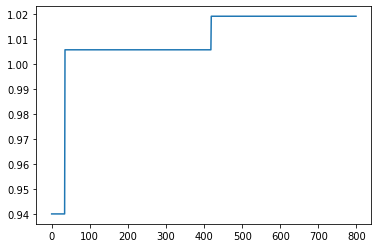

In [9]:
Pc = 0.6 #Inisialisasi Peluang Rekombinasi
Pm = 0.4 #Inisialisasi Peluang Mutasi
n = 8
max_gen = 800 #Banyak maksimal generasi
 
best_individu_fitness=[]
nilai_fitness=[]
populasi = create_individu(n)
 
start_gen = 0
 
while(start_gen < max_gen):
 
  print("---------------------------------GENERASI",start_gen+1,'--------------------------------------')
  populasi_fitness = EncodeKromosom(populasi,start_gen+1)
  print(populasi_fitness)
  populasi_sorted = sorted(populasi_fitness,key=lambda x: x[0],reverse=True)
  best_individu_fitness.append(populasi_sorted[0])
  nilai_fitness.append(populasi_sorted[0][0])
 
  i=0
  elitisme_populasi = []
  while(i<2):
    populasi_unggul = elitisme(populasi_sorted)
    elitisme_populasi.append(populasi_unggul)
    i+=1
    del populasi_sorted[0]
  random_populate = random.sample(populasi_sorted,len(populasi_sorted))
  new_populate = []
 
  while(len(new_populate)<len(populasi_sorted)):
    parent_populate = rouletselectparent(random_populate)
    child_populate = crossover1p(parent_populate[0],parent_populate[1],Pc)
    for i in range(len(child_populate)):
      mutate_temp = mutasi(child_populate[i],Pm)
      new_populate.append(mutate_temp)
    
  populasi = np.concatenate((new_populate, elitisme_populasi))
  start_gen+=1
 
best_individu_fitness_semua = sorted(best_individu_fitness,key=lambda x: x[0],reverse=True)
print("individu terbaik :", best_individu_fitness_semua[0][1])
print("Kromosom X1 :", best_individu_fitness_semua[0][3])
print("kromosom X2:", best_individu_fitness_semua[0][4])
print("pada generasi :", best_individu_fitness_semua[0][2])
print("dengan nilai fungsi fitness:", best_individu_fitness_semua[0][0])
print("dengan nilai fungsi H(X):", best_individu_fitness_semua[0][5])
 
import matplotlib.pyplot as plt
plt.plot(nilai_fitness)
plt.show()